In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [44]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [45]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [46]:
df.groupby('left').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
# Analyzing numeric columns only
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
# Analyzing categorical columns using crosstab in percentage
pd.crosstab(df['salary'],df['left'], normalize='index') * 100

left,0,1
salary,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


In [ ]:
pd.crosstab(df['Department'],df['left'], normalize='index') * 100

left,0,1
Department,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


In [ ]:
'''
Final Variables With Clear Impact on Employee Retention: 
(according to there percentage difference in the above analysis i.e., stayed vs left)

Numerical Factors
1. Satisfaction level
2. Number of projects
3. Average monthly working hours
4. Time spent in the company

Categorical Factors
5. Salary level
6. Department
'''

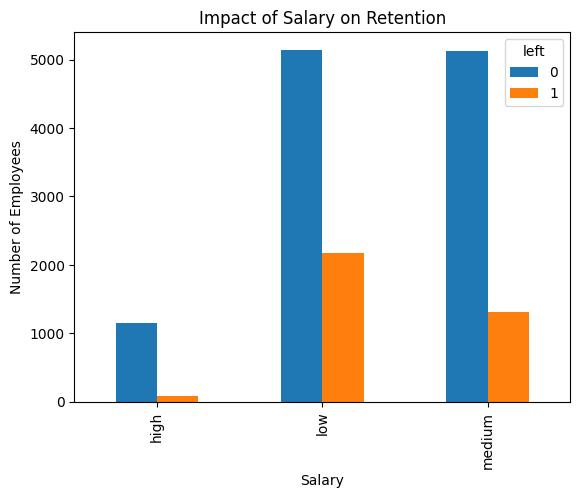

In [ ]:
# Plotting Salary vs Retention

df.groupby(['salary','left']).size().unstack().plot(kind='bar')
plt.title('Impact of Salary on Retention')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

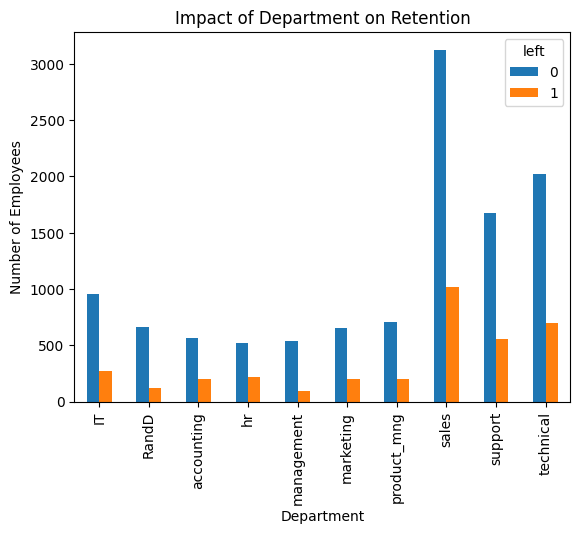

In [ ]:
df.groupby(['Department','left']).size().unstack().plot(kind='bar')
plt.title('Impact of Department on Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

le = LabelEncoder()
df2['salary'] = le.fit_transform(df['salary'])
df2['Department'] = le.fit_transform(df['Department'])

In [55]:
X = df2[['satisfaction_level',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'salary',
        'Department']]

y = df2['left']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
X_test

,satisfaction_level,number_project,average_montly_hours,time_spend_company,salary,Department
6723,0.65,5,226,2,2,5
6473,0.88,3,166,2,1,0
4679,0.69,3,214,2,1,7
862,0.41,2,154,3,1,7
7286,0.87,5,254,2,1,3
...,...,...,...,...,...,...
13388,0.85,4,260,3,2,6
10463,0.21,2,249,3,1,5
5331,0.78,3,156,3,1,6
7499,0.93,5,238,2,2,7


In [58]:
X_train

,satisfaction_level,number_project,average_montly_hours,time_spend_company,salary,Department
12602,0.10,7,250,4,1,6
4889,0.57,4,154,3,2,4
1572,0.39,2,154,3,1,9
13375,0.91,4,132,4,2,0
879,0.82,5,263,5,2,9
...,...,...,...,...,...,...
5191,0.52,4,246,3,1,8
13418,0.49,4,233,7,2,7
5390,0.66,5,249,2,2,8
860,0.79,4,218,5,1,7


In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
model.score(X_test, y_test)

0.7593333333333333

Model is ~76% accurate as per the prediction